# Analysis of Flight Delays and Cancellations
---
By Yağmur Aksoy

In [6]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv(r"C:\Users\aksoy\Downloads\asset-v1_Kodlasam+VB-02+07.05.2023+type@asset+block@flights_weather2022.csv")

In [14]:
df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111006 non-null  int64  
 1   month           111006 non-null  int64  
 2   day             111006 non-null  int64  
 3   dep_time        108566 non-null  float64
 4   sched_dep_time  111006 non-null  int64  
 5   dep_delay       108566 non-null  float64
 6   arr_time        108469 non-null  float64
 7   sched_arr_time  111006 non-null  int64  
 8   arr_delay       108332 non-null  float64
 9   carrier         111006 non-null  object 
 10  flight          111006 non-null  int64  
 11  tailnum         110877 non-null  object 
 12  origin          111006 non-null  object 
 13  dest            111006 non-null  object 
 14  air_time        108332 non-null  float64
 15  distance        111006 non-null  int64  
 16  hour            111006 non-null  int64  
 17  minute    

Let's detect the columns and numbers with missing data using the isnull() command.

In [17]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

dep_time      2440
dep_delay     2440
arr_time      2537
arr_delay     2674
tailnum        129
air_time      2674
wind_dir      3163
wind_speed     279
wind_gust      279
dtype: int64


#### Data Editing

Let's create datetime for Time Series Analysis and Forecasting.

In [20]:
df['date_time'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,date_time
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,2022-01-01
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,2022-01-01


Since our date_time column provides us with this information, let's clear the other columns from our data set.

In [23]:
df = df.drop(['year', 'month', 'day'], axis=1)

Let's move our date_time column to the beginning of the data set

In [26]:
date_time_column = df['date_time']
df = df.drop('date_time', axis=1)
df.insert(0, 'date_time', date_time_column)
df.head()

,date_time,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022-01-01,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022-01-01,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022-01-01,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022-01-01,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022-01-01,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


Since there is a mismatch in the departure and arrival data, let's arrange them in the same format.
- Scheduled Departure Time is made according to 24 hour zones
- Departure Delay information is entered according to minutes
- Arrival Time is entered according to 24 hour zones
- Scheduled Arrival Time is made according to 24 hour zones
- Arrival delay information is entered in minutes and contains negative values.
- Departure time is entered according to 24 hour zones.
#### *Let's convert all data to 4-character data*

###  *Scheduled Arrival Time*

In [30]:
df['sched_arr_time'] = df['sched_arr_time'].astype(str).str.zfill(4)

###  *Scheduled Departure Time*

In [33]:
df['sched_dep_time'] = df['sched_dep_time'].astype(str).str.zfill(4)

###  *Arrival Time*

In [36]:
df['arr_time'] = df['arr_time'].fillna(df['sched_arr_time'])

In [38]:
df['arr_time'] = df['arr_time'].astype(str).str.replace('.0', '', regex=False)

In [40]:
df['arr_time'] = df['arr_time'].astype(str).str.zfill(4)

###  *Departure Time*

In [43]:
df['dep_time'] = df['dep_time'].fillna(df['sched_dep_time'])

In [45]:
df['dep_time'] = df['dep_time'].astype(str).str.replace('.0', '', regex=False)

In [47]:
df['dep_time'] = df['dep_time'].astype(str).str.zfill(4)

###  *Departure Delay Time*

##### Filling in missing 'dep_delay' data

Let's figure out how many negative values ​​we have.

In [56]:
df['dep_delay'] = pd.to_numeric(df['dep_delay'], errors='coerce')

neg_count = (df['dep_delay'] < 0).sum()

print("Total number of negative values:", neg_count)

Total number of negative values: 62976


In [58]:
total_missing_dep_delay = df['dep_delay'].isnull().sum()
print(f"Total number of null dep_delays: {total_missing_dep_delay}")

Total number of null dep_delays: 2440


Let's accept numbers without data without delay.

In [61]:
df['dep_delay'] = df['dep_delay'].fillna(0)

Let's convert the results into integers.

In [64]:
df['dep_delay'] = df['dep_delay'].fillna(0).astype(float).astype(int)

###  *Arrival Delay Time*

##### Filling in missing 'arr_delay' data

Let's write our code to find out how many negative values ​​we have.

In [69]:
df['arr_delay'] = pd.to_numeric(df['arr_delay'], errors='coerce')

neg_count = (df['arr_delay'] < 0).sum()

print("Total number of negative values:", neg_count)

Total number of negative values: 68178


In [71]:
total_missing_arr_delay = df['arr_delay'].isnull().sum()
print(f"Total number of null arr_delays: {total_missing_arr_delay}")

Total number of null arr_delays: 2674


Let's accept the data that is incomplete without any delay.

In [74]:
df['arr_delay'] = df['arr_delay'].fillna(0)

Let's convert the results into integers.

In [77]:
df['arr_delay'] = df['arr_delay'].fillna(0).astype(float).astype(int)

In [79]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

tailnum        129
air_time      2674
wind_dir      3163
wind_speed     279
wind_gust      279
dtype: int64


At the end of these operations, we are left with 5 columns containing null data.

In [82]:
num_tailnum = df['tailnum'].nunique()
print(f"Number of aircraft tail numbers: {num_tailnum}")

Number of aircraft tail numbers: 3520


There are 3520 different tailnums. Planes going to the same destination from the same airline can have the same tailnum. Let's fill in the blanks with the most used one.

In [85]:
most_used_tailnum = df.groupby(['airline', 'dest'])['tailnum'].agg(lambda x: x.value_counts().idxmax())

df['tailnum'] = df.apply(lambda row: most_used_tailnum.get((row['airline'], row['dest']), row['tailnum']), axis=1)

print(f"Total missing values {df['tailnum'].isnull().sum()}")

Total missing values 0


###  *Air Time*

Air time data can be found by subtracting the departure time and arrival time data. To do this, first convert this data to datetime data and then fill in the data for how many hours it has been in the air.

In [88]:
print(df['air_time'].head(5))

0    221.0
1    193.0
2    261.0
3    193.0
4    196.0
Name: air_time, dtype: float64


In [90]:
df['air_time'] = df['air_time'].astype(str).str.replace('.0', '', regex=False)

In [92]:
print(df['air_time'].head(5))

0    221
1    193
2    261
3    193
4    196
Name: air_time, dtype: object


Air time is entered in minutes, and other data is entered in 24-hour time zones. Let's fill in the null data according to the average air time of the same planes going to the same destination. We can provide data by replacing the non-numeric numbers in the air time column with null data and replacing it with the new average we found.

In [95]:
df['air_time'] = pd.to_numeric(df['air_time'], errors='coerce')

Let's fill in the null data.

In [98]:
df['air_time'] = pd.to_numeric(df['air_time'], errors='coerce')

mean_airtime = df.groupby(['dest', 'carrier'])['air_time'].mean().reset_index()
for index, row in mean_airtime.iterrows():
    dest = row['dest']
    carrier = row['carrier']
    mean_time = row['air_time']
    df.loc[(df['dest'] == dest) & (df['carrier'] == carrier) & (df['air_time'].isnull()), 'air_time'] = mean_time


df['air_time'] = df['air_time'].fillna(0)

In [100]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

wind_dir      3163
wind_speed     279
wind_gust      279
dtype: int64


###  *Wind Direction*

Let's fill in the blanks with the average of flights to the same destination on the same day.

In [103]:
df['wind_dir'] = df.groupby(['dest', 'date_time'])['wind_dir'].transform(lambda x: x.fillna(x.mean()))

In [104]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

wind_dir       45
wind_speed    279
wind_gust     279
dtype: int64


Let's fill in the remaining 45 data with the grand average.

In [110]:
df.loc[df['wind_dir'].isnull(), 'wind_dir'] = mean_wind_dir

###  *Wind Speed ve Wind Gust*

Aynı Let's fill in the blanks with the average of flights to the same destination on the same day.

In [113]:
df['wind_speed'] = df.groupby(['dest', 'date_time'])['wind_speed'].transform(lambda x: x.fillna(x.mean()))

In [114]:
df['wind_gust'] = df.groupby(['dest', 'date_time'])['wind_gust'].transform(lambda x: x.fillna(x.mean()))

In [115]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

wind_speed    3
wind_gust     3
dtype: int64


Let's fill in the remaining 3 data with the grand average.

In [124]:
mean_wind_speed = df['wind_speed'].mean()
df['wind_speed'] = df['wind_speed'].fillna(mean_wind_speed)

In [126]:
mean_wind_gust = df['wind_gust'].mean()
df['wind_gust'] = df['wind_gust'].fillna(mean_wind_gust)

In [128]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


#### *Let's convert all data to datetime data*

Before filling in all the data, let's fill in the arrival time and departure time data, which we filled as 0000, according to the values ​​we found between the scheduled arrival time and scheduled departure time with the algorithm above.

In [132]:
df['sched_dep_time'] = df['sched_dep_time'].astype(str).str.zfill(4)
df['sched_dep_time'] = pd.to_datetime(df['sched_dep_time'], format='%H%M').dt.time

In [134]:
df['sched_arr_time'] = df['sched_arr_time'].astype(str).str.zfill(4)
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], format='%H%M').dt.time

In [135]:
df['dep_time'] = df['dep_time'].astype(str).str.zfill(4)
df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H%M', errors='coerce').dt.time

In [137]:
df['arr_time'] = df['arr_time'].astype(str).str.zfill(4)
df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H%M', errors='coerce').dt.time

In [139]:
df.head()

,date_time,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022-01-01,00:01:00,23:59:00,2,06:04:00,06:18:00,-14,UA,555,N75410,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022-01-01,00:01:00,22:50:00,71,02:42:00,01:42:00,60,AS,72,N281AK,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022-01-01,00:10:00,23:55:00,15,07:59:00,07:30:00,29,AS,270,N546AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022-01-01,00:25:00,23:50:00,35,06:06:00,05:50:00,16,AS,7,N844VA,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022-01-01,00:35:00,23:49:00,46,06:16:00,05:45:00,31,UA,507,N466UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [142]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

dep_time     17
arr_time    152
dtype: int64


Let's remove the remaining data from our dataset.

In [145]:
df = df.dropna(subset=['dep_time', 'arr_time'])

In [147]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


#### *Detect and remove duplicates*

In [150]:
duplicates = df.duplicated()
print(duplicates.value_counts())

False    110837
Name: count, dtype: int64


In [152]:
print(duplicates.sum())

0


### 1-Creating a categorical variable to understand the relationship between each airline and distance.

First, let's find out how many airlines we have and our maximum and minimum flight distance.

In [156]:
num_airlines = df['carrier'].nunique()
print(f"Number of Airlines: {num_airlines}")

Number of Airlines: 12


In [158]:
df['distance'].max()

2724

Maximum distance is 2724 miles.

In [161]:
df['distance'].min()

93

The minimum distance is 93 miles.

#### Creating a Category

Let's create a category based on these distances,
- Short Distance between 0 and 500 miles
- Medium Distance between 500 and 1000 miles
- Long Distance is more than 1000 miles

In [166]:
def categorize_distance(distance):
    if distance <= 500:
        return 'Short Distance'
    elif 500 < distance <= 1000:
        return 'Medium Distance'
    else:
        return 'Long Distance'

df['distance_category'] = df['distance'].apply(categorize_distance)

#### Making Sense of Data

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

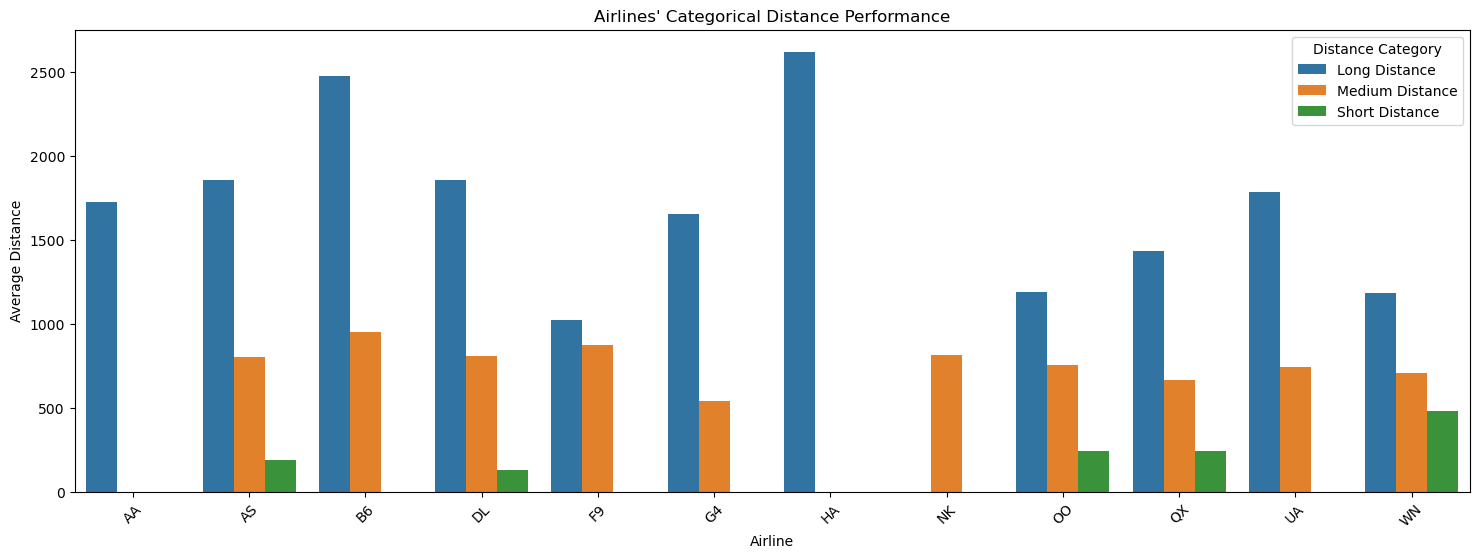

In [175]:
carrier_category_distance = df.groupby(['carrier', 'distance_category'])['distance'].mean().reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(data=carrier_category_distance, x='carrier', y='distance', hue='distance_category')
plt.title('Airlines\' Categorical Distance Performance')
plt.xlabel('Airline')
plt.ylabel('Average Distance')
plt.xticks(rotation=45)
plt.legend(title='Distance Category')
plt.show()

According to this table, the airlines that fly in the short-haul category are AS, DL, OO, WN and QX airlines. The airline that flies the longest distance on average is HA airline, and this airline does not operate any medium or short-distance flights.

### 2. Determining the companies that operate the most flights among airline companies.

In [179]:
flight_counts = df['carrier'].value_counts().reset_index()
flight_counts.columns = ['carrier', 'flight_count']

In [181]:
flight_counts_sorted = flight_counts.sort_values(by='flight_count', ascending=False)

In [183]:
top_carriers = flight_counts_sorted.head(12)
print(top_carriers)


   carrier  flight_count
0       AS         41637
1       QX         19673
2       DL         16500
3       OO         13242
4       WN          7038
5       UA          6285
6       AA          3663
7       NK           857
8       HA           725
9       B6           667
10      F9           454
11      G4            96


To better understand this data, we can use a bar chart to better understand its distribution and the dominant airlines.

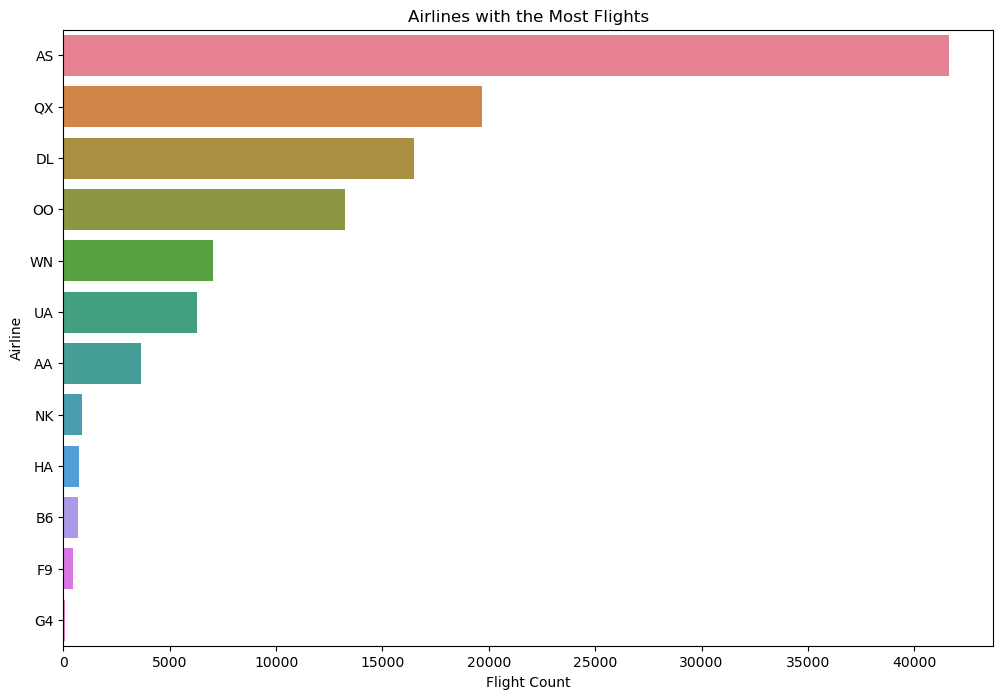

In [196]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_carriers, x='flight_count', y='carrier', hue='carrier', legend=False)
plt.xlabel('Flight Count') 
plt.ylabel('Airline')   
plt.title('Airlines with the Most Flights') 
plt.show()

AS,QX,DL,OO and WN are the airlines that have the most flights by far, and in our inference above, we found that AS,DL,OO,WN AND QX airlines are also airlines that fly short distances.
#### *Accordingly, we can understand that airlines that offer flights to short distances have more (total) flights.*

### 3. Comparison of airline performance assuming delays.

The arr delay data provides us with the total amount of delay.

After filling in the missing data, let's examine which distances have more average delays according to distance categories using a bar plot.

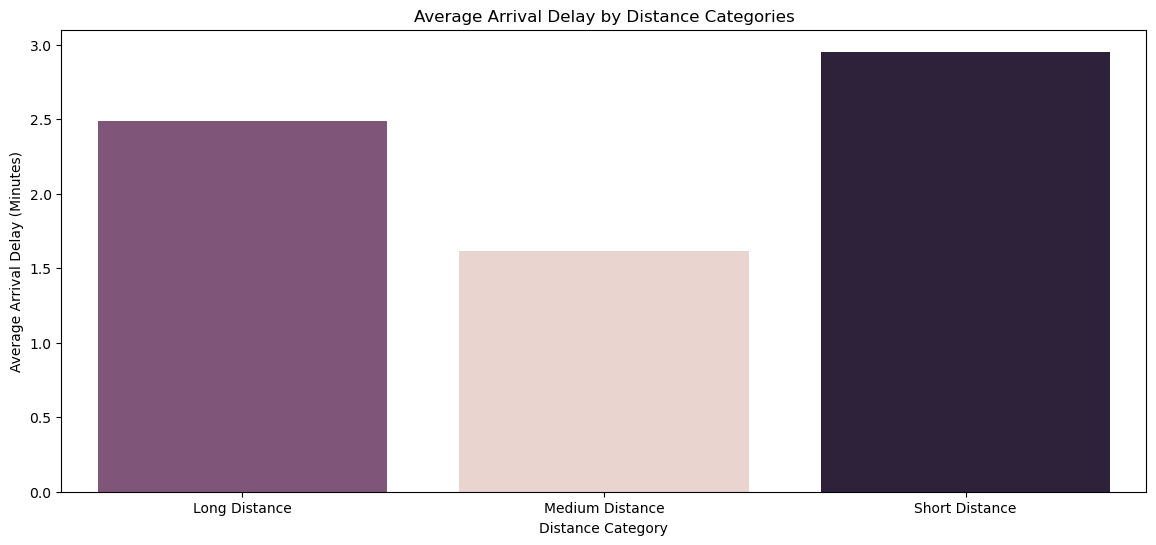

In [204]:
delay_by_distance = df.groupby('distance_category')['arr_delay'].mean().reset_index()

plt.figure(figsize=(14, 6))

sns.barplot(data=delay_by_distance, x='distance_category', y='arr_delay', hue='arr_delay' , legend=False)

plt.xlabel('Distance Category')  # X-axis label
plt.ylabel('Average Arrival Delay (Minutes)')  # Y-axis label
plt.title('Average Arrival Delay by Distance Categories')  # Title

plt.show()

We can observe that most delays occur on short-haul flights.

Likewise, we can do the following analysis to find out which destinations usually cause delays:

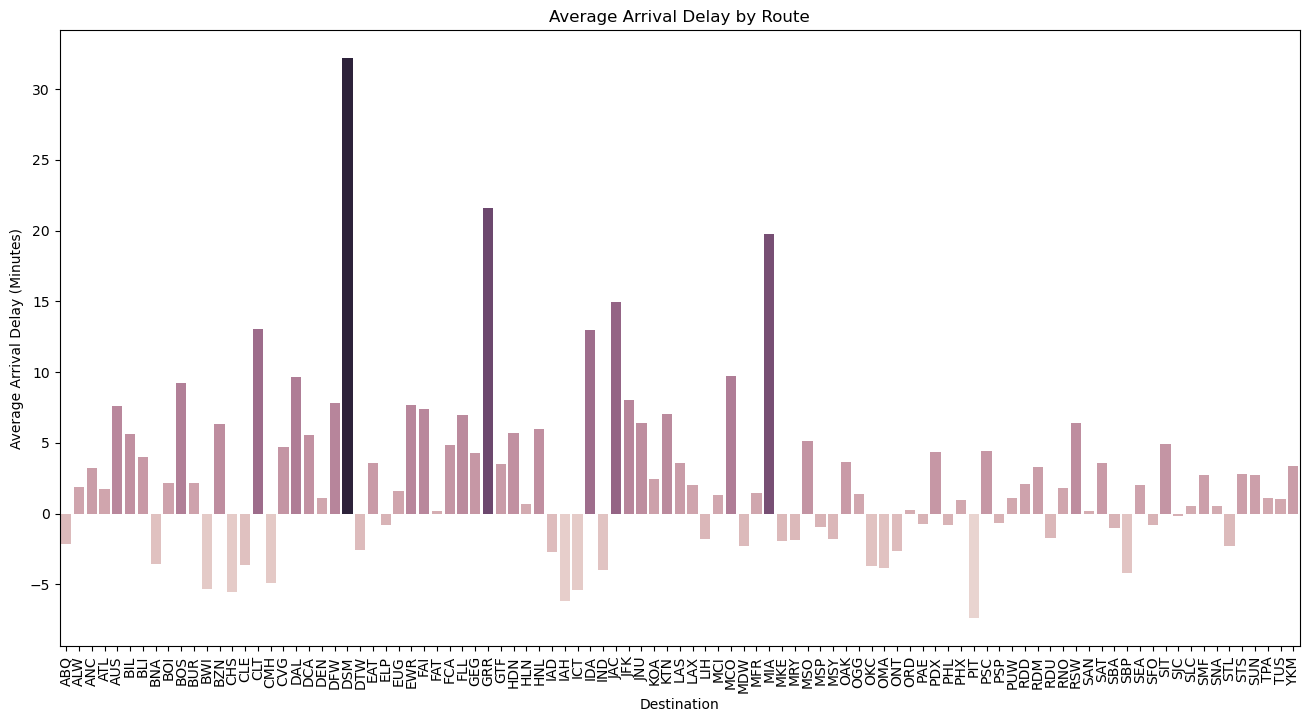

In [208]:
delay_by_dest = df.groupby('dest')['arr_delay'].mean().reset_index()

plt.figure(figsize=(16, 8))

sns.barplot(data=delay_by_dest, x='dest', y='arr_delay',hue='arr_delay' , legend=False)

plt.xlabel('Destination')  # X-axis label
plt.ylabel('Average Arrival Delay (Minutes)')  # Y-axis label
plt.title('Average Arrival Delay by Route')  # Title

plt.xticks(rotation=90)

plt.show()

The route with an average delay of over 30 minutes is DSM. The route with a negative average delay is PIT.

In [211]:
delay_by_dest_sorted = delay_by_dest.sort_values(by='arr_delay', ascending=False)
delay_by_dest_sorted.head()

,dest,arr_delay
22,DSM,32.173913
33,GRR,21.625000
55,MIA,19.757732
43,JAC,14.962500
15,CLT,13.013011


### 4. Show whether airline performance varies according to different months of the year and show the best 5 airline performances and the worst 5 performances.

In [217]:
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df[['date_time', 'year', 'month']].head()

,date_time,year,month
0,2022-01-01,2022,1
1,2022-01-01,2022,1
2,2022-01-01,2022,1
3,2022-01-01,2022,1
4,2022-01-01,2022,1


In [219]:
df[['date_time', 'year', 'month']].tail()

,date_time,year,month
111001,2022-06-30,2022,6
111002,2022-06-30,2022,6
111003,2022-06-30,2022,6
111004,2022-06-30,2022,6
111005,2022-06-30,2022,6


All data is for 2022, so our only categorical variable will be the months of the year and we have 6 months of data, we can find the data between January and June this way.

In [222]:
flights_by_month = df.groupby(['month', 'carrier']).size().reset_index(name='flight')

flights_by_month['month'] = flights_by_month['month'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June'
})

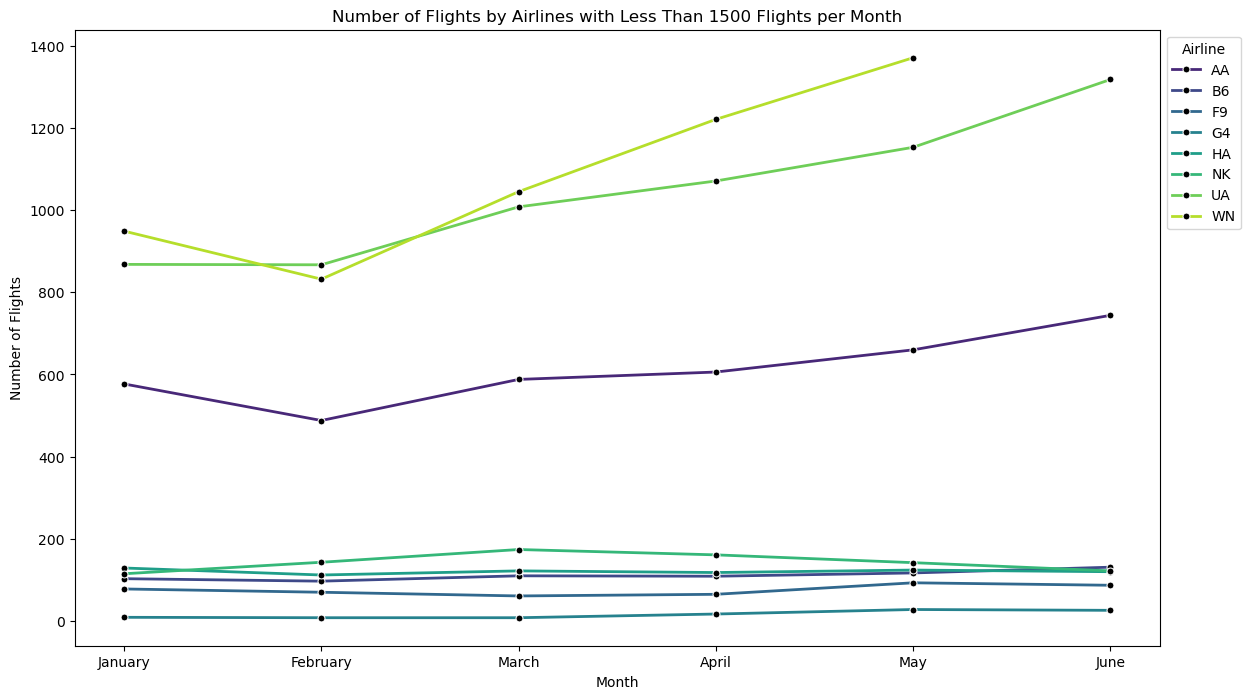

In [236]:
flights_by_month_less_than_1500 = flights_by_month[flights_by_month['flight'] < 1500]

plt.figure(figsize=(14, 8))

sns.lineplot(data=flights_by_month_less_than_1500, 
             x='month', 
             y='flight', 
             hue='carrier', 
             palette='viridis', 
             linewidth=2, 
             marker='o', 
             markersize=5, 
             markerfacecolor='black') 
plt.xlabel('Month') 
plt.ylabel('Number of Flights') 
plt.title('Number of Flights by Airlines with Less Than 1500 Flights per Month')
plt.legend(title='Airline', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(ticks=range(0, 6), labels=['January', 'February', 'March', 'April', 'May', 'June'])
plt.show()

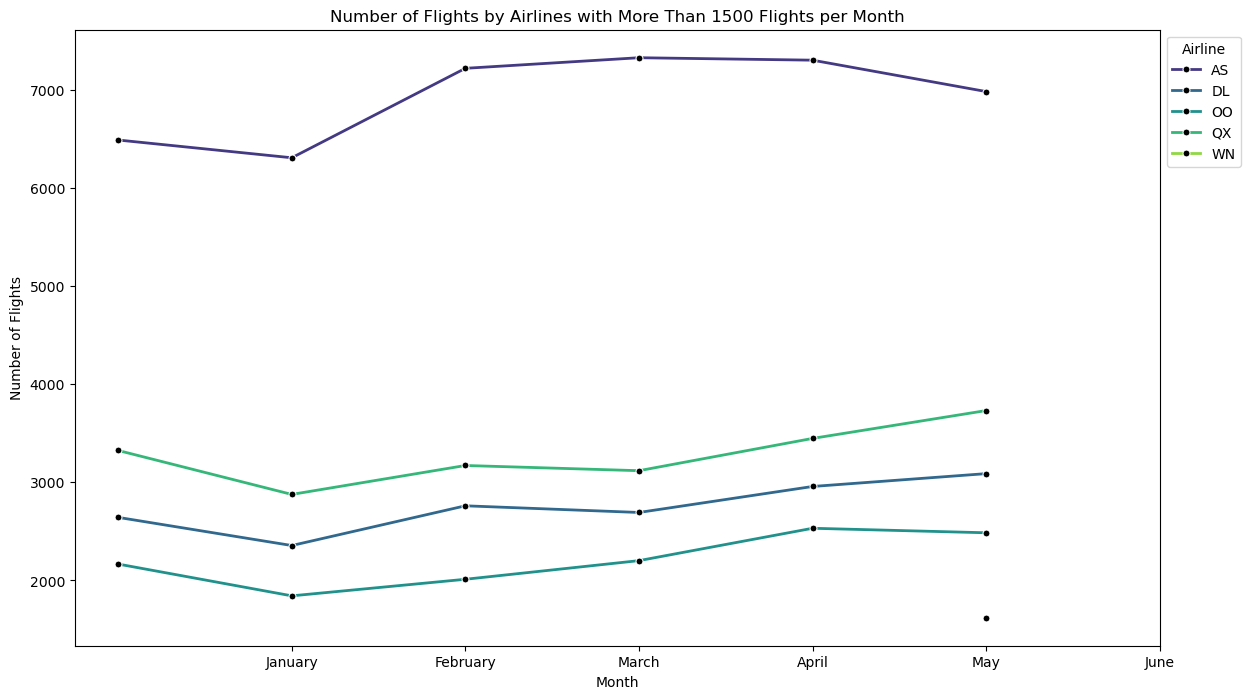

In [240]:
flights_by_month_more_than_1500 = flights_by_month[flights_by_month['flight'] > 1500]

plt.figure(figsize=(14, 8))

sns.lineplot(data=flights_by_month_more_than_1500, 
             x='month', 
             y='flight', 
             hue='carrier', 
             palette='viridis', 
             linewidth=2, 
             marker='o', 
             markersize=5, 
             markerfacecolor='black') 

plt.xlabel('Month')  
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Airlines with More Than 1500 Flights per Month') 
plt.legend(title='Airline', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(ticks=range(1, 7), labels=['January', 'February', 'March', 'April', 'May', 'June'])

plt.show()

We see an increase in flights in March, May and June.

In [243]:
total_flights_by_carrier = df.groupby('carrier')['flight'].count().reset_index()
total_flights_by_carrier.columns = ['carrier', 'total_flights']
top_carriers = total_flights_by_carrier.sort_values(by='total_flights', ascending=False).head(5)
least_carriers = total_flights_by_carrier.sort_values(by='total_flights', ascending=True).head(5)
flights_by_month = df.groupby(['carrier', 'month'])['flight'].count().reset_index()

In [245]:
print("Top 5 airlines:")
print(top_carriers.to_string(index=False))

Top 5 airlines:
carrier  total_flights
     AS          41637
     QX          19673
     DL          16500
     OO          13242
     WN           7038


In [249]:
print("\nThe 5 worst performing airlines:")
print(least_carriers.to_string(index=False))


The 5 worst performing airlines:
carrier  total_flights
     G4             96
     F9            454
     B6            667
     HA            725
     NK            857


Let's find the flight performance percentages of airlines compared to the previous month.

In [267]:
flights_pivot = flights_by_month.pivot(index='carrier', columns='month', values='flight')
print("\n\n\nNumber of Flights by Airlines According to Month:")
print(flights_pivot.to_string())




Number of Flights by Airlines According to Month:
month       1     2     3     4     5     6
carrier                                    
AA        577   488   588   606   660   744
AS       6490  6309  7221  7329  7304  6984
B6        103    97   110   109   117   131
DL       2643  2356  2761  2693  2958  3089
F9         78    70    61    65    93    87
G4          9     8     8    17    28    26
HA        129   112   122   118   124   120
NK        115   143   174   161   142   122
OO       2167  1843  2012  2202  2532  2486
QX       3325  2877  3172  3119  3448  3732
UA        868   867  1008  1071  1153  1318
WN        949   832  1045  1221  1371  1620


In [269]:
change_percentages = []

for carrier in flights_pivot.index:
    flights_6_months = flights_pivot.loc[carrier].values

    change_percentage1 = ((flights_6_months[1] - flights_6_months[0]) / flights_6_months[0]) * 100 
    change_percentage2 = ((flights_6_months[2] - flights_6_months[1]) / flights_6_months[1]) * 100  
    change_percentage3 = ((flights_6_months[3] - flights_6_months[2]) / flights_6_months[2]) * 100 
    change_percentage4 = ((flights_6_months[4] - flights_6_months[3]) / flights_6_months[3]) * 100 
    change_percentage5 = ((flights_6_months[5] - flights_6_months[4]) / flights_6_months[4]) * 100 

    change_percentages.append({
        'carrier': carrier,
        'January-February': change_percentage1,
        'February-March': change_percentage2,
        'March-April': change_percentage3,
        'April-May': change_percentage4,
        'May-June': change_percentage5
    })

change_df = pd.DataFrame(change_percentages)

sorted_change_df = change_df.sort_values(by='May-June', ascending=False)

print("\tJanuary-February\tFebruary-March\tMarch-April\tApril-May\tMay-June")
for index, row in sorted_change_df.iterrows():
    print(f"{row['carrier']}\t{row['January-February']:.2f}%\t\t{row['February-March']:.2f}%\t\t{row['March-April']:.2f}%\t\t{row['April-May']:.2f}%\t\t{row['May-June']:.2f}%")

	January-February	February-March	March-April	April-May	May-June
WN	-12.33%		25.60%		16.84%		12.29%		18.16%
UA	-0.12%		16.26%		6.25%		7.66%		14.31%
AA	-15.42%		20.49%		3.06%		8.91%		12.73%
B6	-5.83%		13.40%		-0.91%		7.34%		11.97%
QX	-13.47%		10.25%		-1.67%		10.55%		8.24%
DL	-10.86%		17.19%		-2.46%		9.84%		4.43%
OO	-14.95%		9.17%		9.44%		14.99%		-1.82%
HA	-13.18%		8.93%		-3.28%		5.08%		-3.23%
AS	-2.79%		14.46%		1.50%		-0.34%		-4.38%
F9	-10.26%		-12.86%		6.56%		43.08%		-6.45%
G4	-11.11%		0.00%		112.50%		64.71%		-7.14%
NK	24.35%		21.68%		-7.47%		-11.80%		-14.08%


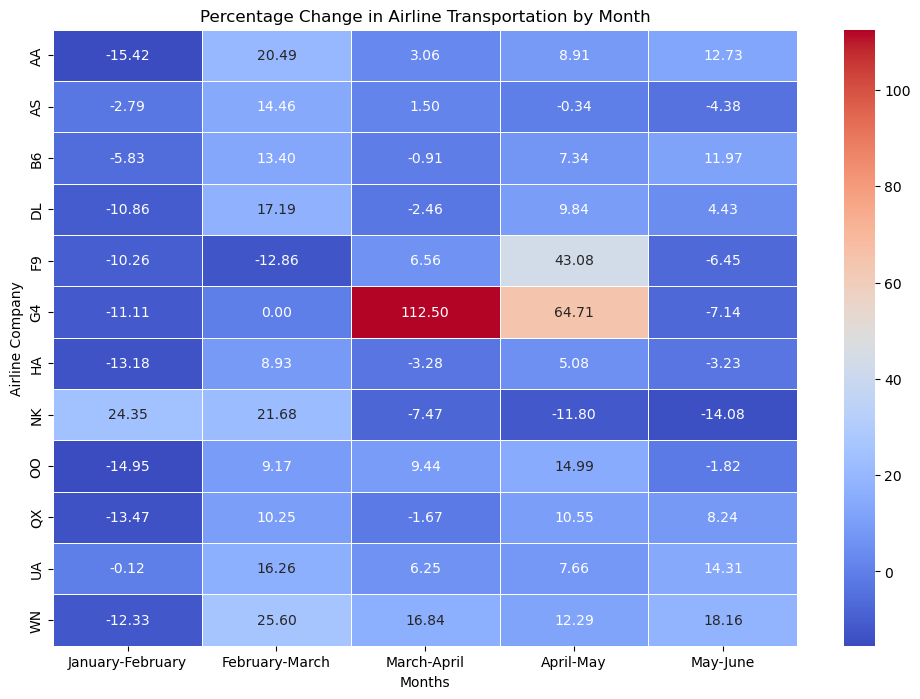

In [271]:
change_df.set_index('carrier', inplace=True)

change_df = change_df[['January-February', 'February-March', 'March-April', 'April-May', 'May-June']]

plt.figure(figsize=(12, 8))

sns.heatmap(change_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Percentage Change in Airline Transportation by Month') 
plt.xlabel('Months')  
plt.ylabel('Airline Company') 

plt.show()

We see that G4 airline's flight percentage increased significantly in March-April and April-May.

### 5. Determine what percentage of flight delays occur and show how it varies by airline?

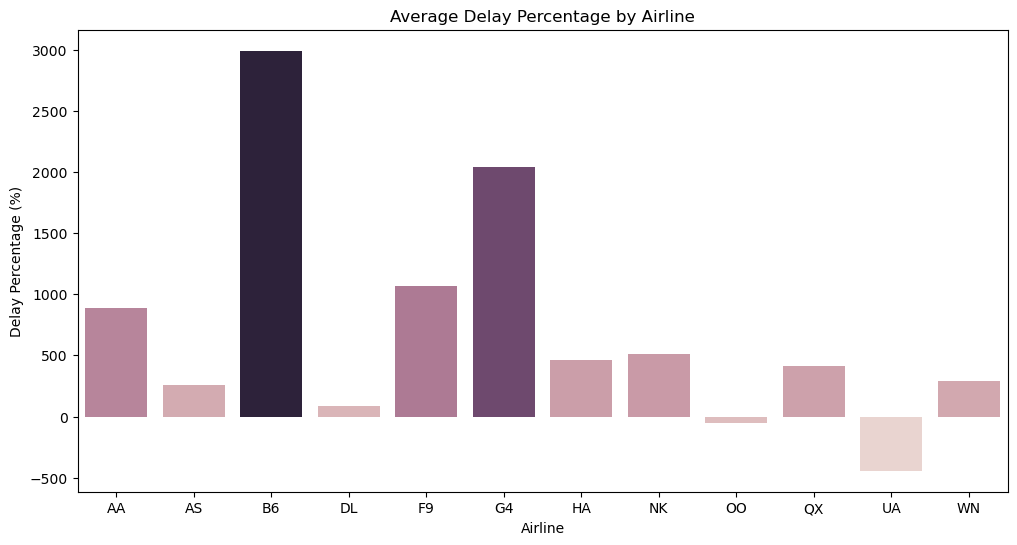

In [279]:
delay_by_airline = df.groupby('carrier').agg({'arr_delay': 'sum', 'flight': 'count'}).reset_index()

delay_by_airline.columns = ['carrier', 'arr_delay', 'total_flights']

delay_by_airline['delay_percentage'] = (delay_by_airline['arr_delay'] / delay_by_airline['total_flights']) * 100 

plt.figure(figsize=(12, 6))
sns.barplot(data=delay_by_airline, x='carrier', y='delay_percentage', hue='delay_percentage' , legend=False)
plt.xlabel('Airline') 
plt.ylabel('Delay Percentage (%)')  
plt.title('Average Delay Percentage by Airline')

plt.show()

In [281]:
delay_by_airline_sorted = delay_by_airline.sort_values(by='delay_percentage', ascending=False)
delay_by_airline_sorted.head()

,carrier,arr_delay,total_flights,delay_percentage
2,B6,19951,667,2991.154423
5,G4,1961,96,2042.708333
4,F9,4854,454,1069.162996
0,AA,32370,3663,883.701884
7,NK,4393,857,512.602100


B6, G4, F9, AA and NK airlines are the 5 airlines with the highest delay percentage.

#### *IS THERE A LOGICAL PARAMETER BETWEEN WEATHER VARIABLES AND DELAY?*

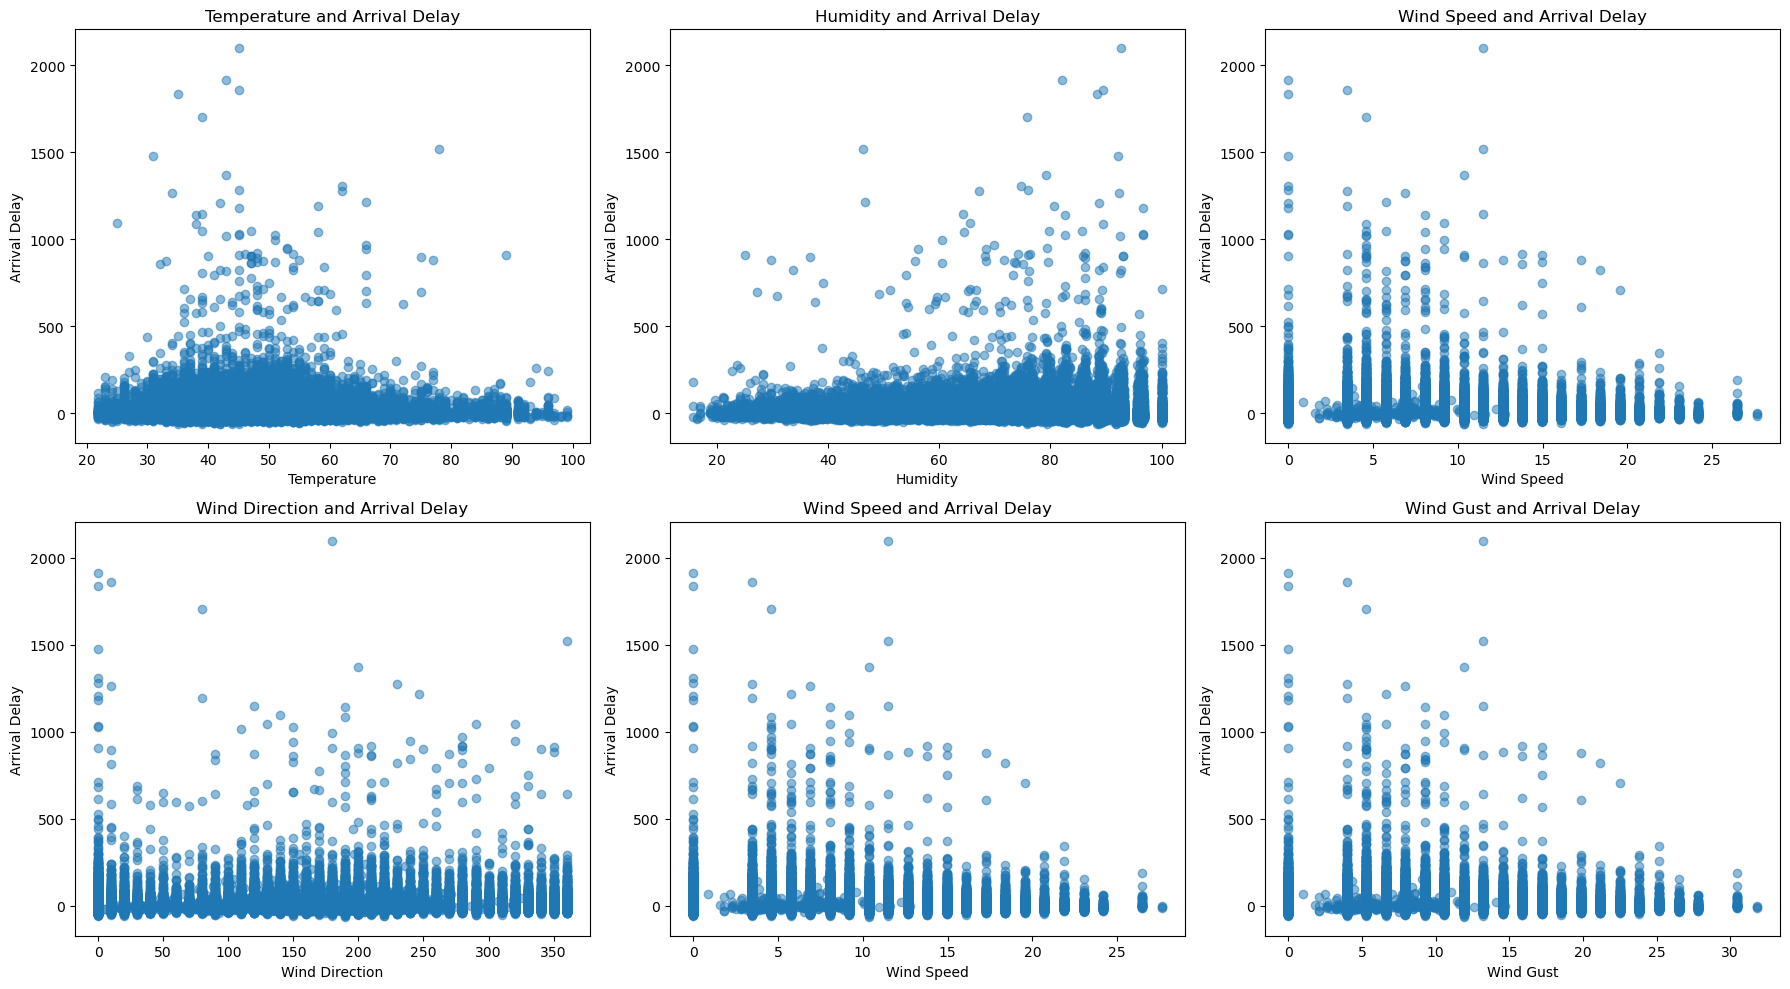

In [285]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Temperature and arrival delay
axs[0, 0].scatter(df['temp'], df['arr_delay'], alpha=0.5)
axs[0, 0].set_title('Temperature and Arrival Delay')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Arrival Delay')

# Humidity and arrival delay
axs[0, 1].scatter(df['humid'], df['arr_delay'], alpha=0.5)
axs[0, 1].set_title('Humidity and Arrival Delay')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Arrival Delay')

# Wind speed and arrival delay
axs[0, 2].scatter(df['wind_speed'], df['arr_delay'], alpha=0.5)
axs[0, 2].set_title('Wind Speed and Arrival Delay')
axs[0, 2].set_xlabel('Wind Speed')
axs[0, 2].set_ylabel('Arrival Delay')

# Wind direction and arrival delay
axs[1, 0].scatter(df['wind_dir'], df['arr_delay'], alpha=0.5)
axs[1, 0].set_title('Wind Direction and Arrival Delay')
axs[1, 0].set_xlabel('Wind Direction')
axs[1, 0].set_ylabel('Arrival Delay')

# Wind speed and arrival delay (duplicate plot removed)
axs[1, 1].scatter(df['wind_speed'], df['arr_delay'], alpha=0.5)
axs[1, 1].set_title('Wind Speed and Arrival Delay')
axs[1, 1].set_xlabel('Wind Speed')
axs[1, 1].set_ylabel('Arrival Delay')

# Wind gust and arrival delay
axs[1, 2].scatter(df['wind_gust'], df['arr_delay'], alpha=0.5)
axs[1, 2].set_title('Wind Gust and Arrival Delay')
axs[1, 2].set_xlabel('Wind Gust')
axs[1, 2].set_ylabel('Arrival Delay')

plt.tight_layout()
plt.show()

We can divide the total delay time we found in the Total delay column by the day and find out at which time of day the flights departing have more delays.

#### Creating a categorical variable - Delay Category

Let's divide it into 5 levels according to the delay percentages. In this category, let's not take into account the early bird data, that is, the negative data.

In [292]:
positive_delay = df['arr_delay'][df['arr_delay'] > 0]

df['delay_category'] = pd.qcut(positive_delay, q=5, labels=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'])

df['delay_category'] = df['delay_category'].cat.add_categories(['No Delay'])
df.loc[df['arr_delay'] <= 0, 'delay_category'] = 'No Delay'

print("\nCategory Ranges:")
bins = pd.qcut(positive_delay, q=5, retbins=True)[1]
for i in range(len(bins) - 1):
    print(f"{df['delay_category'].cat.categories[i]}: [{bins[i]}, {bins[i + 1]}] minutes")


Category Ranges:
Level 1: [1.0, 4.0] minutes
Level 2: [4.0, 10.0] minutes
Level 3: [10.0, 19.0] minutes
Level 4: [19.0, 39.0] minutes
Level 5: [39.0, 2098.0] minutes


#### Creating a categorical variable - Hour Category

In [295]:
df.sched_dep_time.head()

0    23:59:00
1    22:50:00
2    23:55:00
3    23:50:00
4    23:49:00
Name: sched_dep_time, dtype: object

In [297]:
df['hour_category_date_time'] = df['sched_dep_time'].apply(lambda x: str((x.hour - 1) % 24).zfill(2) + ':' + str(x.minute).zfill(2) + ':' + str(x.second).zfill(2))

df['hour_category'] = df['hour_category_date_time'].str[:2] + '-' + df['hour_category_date_time'].str[:2].apply(lambda x: str(int(x) + 1).zfill(2))

In [299]:
df.tail()

,date_time,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,...,wind_gust,precip,pressure,visib,distance_category,year,month,delay_category,hour_category_date_time,hour_category
111001,2022-06-30,11:55:00,11:55:00,0,20:33:00,20:33:00,0,UA,206,N17265,...,10.594357,0.0,1021.5,10.0,Long Distance,2022,6,No Delay,10:55:00,10-11
111002,2022-06-30,14:48:00,14:48:00,0,17:32:00,17:32:00,0,DL,323,N108DQ,...,7.945768,0.0,1021.9,10.0,Medium Distance,2022,6,No Delay,13:48:00,13-14
111003,2022-06-30,17:51:00,17:51:00,0,23:52:00,23:52:00,0,DL,377,N131DU,...,7.945768,0.0,1021.3,10.0,Long Distance,2022,6,No Delay,16:51:00,16-17
111004,2022-06-30,11:45:00,11:45:00,0,20:29:00,20:29:00,0,DL,114,N723TW,...,10.594357,0.0,1021.5,10.0,Long Distance,2022,6,No Delay,10:45:00,10-11
111005,2022-06-30,07:20:00,07:20:00,0,15:44:00,15:44:00,0,DL,168,N706TW,...,6.621473,0.0,1021.8,10.0,Long Distance,2022,6,No Delay,06:20:00,06-07


In [301]:
delay_by_hour = df.groupby('hour_category')['arr_delay'].mean().reset_index() 
max_delay_category = delay_by_hour.loc[delay_by_hour['arr_delay'].idxmax()] 
print("The category with the most delays:" , max_delay_category['hour_category']) 
print("Average Delay Time:", max_delay_category['arr_delay'] ,'min')

The category with the most delays: 20-21
Average Delay Time: 8.194288012872084 min


With the time category we created, we can read how many routes the flights have made at which intervals.

In this way, let's find the average of the delays in hour_category and find out in which category the most delays occur.

In [305]:
delay_by_hour = df.groupby('hour_category')['arr_delay'].mean().reset_index()
print(delay_by_hour)

   hour_category  arr_delay
0          00-01 -20.277778
1          04-05  -6.556438
2          05-06  -4.080121
3          06-07  -2.256337
4          07-08   1.190044
5          08-09   0.064704
6          09-10   1.341175
7          10-11   1.876587
8          11-12   2.213788
9          12-13   1.416091
10         13-14   3.034446
11         14-15   5.338714
12         15-16   4.562486
13         16-17   5.543997
14         17-18   5.561616
15         18-19   3.453023
16         19-20   5.511676
17         20-21   8.194288
18         21-22   6.365893
19         22-23   5.864903
20         23-24   2.669609


In [307]:
missing_hours = ['01-02', '02-03']

for hour in missing_hours:
    flights_in_hour = df[df['hour_category'] == hour]
    if flights_in_hour.empty:
        print(f"No flight data found for the time slot {hour}.")
    else:
        print(f"Found {flights_in_hour.shape[0]} flight records for the time slot {hour}.")

No flight data found for the time slot 01-02.
No flight data found for the time slot 02-03.


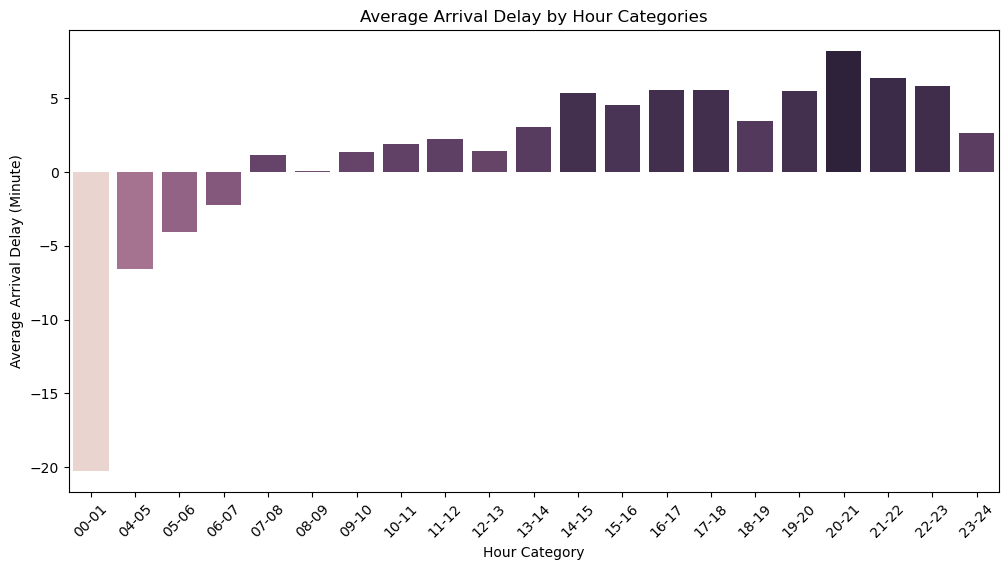

In [311]:
plt.figure(figsize=(12, 6))
sns.barplot(data=delay_by_hour, x='hour_category', y='arr_delay', hue='arr_delay', legend=False)
plt.xlabel('Hour Category')
plt.ylabel('Average Arrival Delay (Minute)')
plt.title('Average Arrival Delay by Hour Categories')
plt.xticks(rotation=45)
plt.show()

### 6. Which routes have the highest delay times?

In [315]:
total_delays_by_route = df.groupby('route')['arr_delay'].agg(['count', 'mean']).reset_index()
total_delays_by_route.columns = ['route', 'total_flights', 'avg_delay']

top_delays = total_delays_by_route.sort_values(by='avg_delay', ascending=False).head(5)

print("Top 5 Routes with the Highest Delays:")
for index, row in top_delays.iterrows():
    print(f"{row['route']} - Total Flights: {row['total_flights']} - Average Delay: {row['avg_delay']:2.1f} minutes")

Top 5 Routes with the Highest Delays:
PDX-DSM - Total Flights: 23 - Average Delay: 32.2 minutes
PDX-GRR - Total Flights: 24 - Average Delay: 21.6 minutes
PDX-DAL - Total Flights: 10 - Average Delay: 21.1 minutes
SEA-MIA - Total Flights: 194 - Average Delay: 19.8 minutes
PDX-BOS - Total Flights: 131 - Average Delay: 17.9 minutes


In [321]:
print(delay_counts_by_route.columns)

Index(['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'No Delay',
       'total_delays'],
      dtype='object', name='delay_category')


In [323]:
delay_counts_by_route = df.groupby('route')['delay_category'].value_counts().unstack(fill_value=0)

delay_counts_by_route['total_delays'] = delay_counts_by_route.sum(axis=1)

delay_counts_by_route['level_5_probability'] = delay_counts_by_route['Level 5'] / delay_counts_by_route['total_delays']

top_routes_level_5_probability = delay_counts_by_route.sort_values(by='level_5_probability', ascending=False).head(5)

print("Top Routes with the Highest Probability of Level 5 Delays:")
print(top_routes_level_5_probability[['level_5_probability']])

Top Routes with the Highest Probability of Level 5 Delays:
delay_category  level_5_probability
route                              
PDX-DSM                    0.304348
PDX-GRR                    0.208333
PDX-STL                    0.166667
PDX-EWR                    0.163317
PDX-FLL                    0.148936


1. seviye gecikme yaşayabilecek rotalar ise şu şekildedir.

In [325]:
delay_counts_by_route = df.groupby('route')['delay_category'].value_counts().unstack(fill_value=0)

delay_counts_by_route['total_delays'] = delay_counts_by_route.sum(axis=1)

delay_counts_by_route['level_1_probability'] = delay_counts_by_route['Level 1'] / delay_counts_by_route['total_delays']

top_routes_level_1_probability = delay_counts_by_route.sort_values(by='level_1_probability', ascending=True).head(5)

print("Top Routes with the Highest Probability of Level 1 Delays:")
print(top_routes_level_1_probability[['level_1_probability']])

Top Routes with the Highest Probability of Level 1 Delays:
delay_category  level_1_probability
route                              
PDX-STL                    0.000000
PDX-GRR                    0.000000
PDX-IAH                    0.022727
SEA-PIT                    0.023529
SEA-RSW                    0.024793


Flights departing from PDX airport are most likely to experience delays. The 5 routes most likely to experience Level 5 delays can be seen in the list above.

In [328]:
total_origins = df['origin'].nunique()
print("Total Number of Origin Airports:", total_origins)

Total Number of Origin Airports: 2


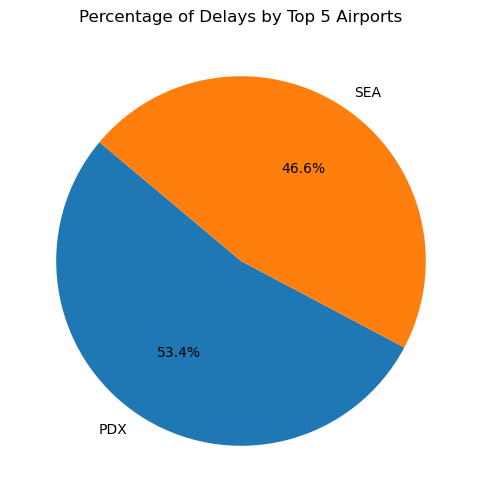

In [332]:
import matplotlib.pyplot as plt

top_airports = df.groupby('origin')['arr_delay'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
plt.pie(top_airports, labels=top_airports.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Delays by Top 5 Airports')
plt.show()